In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from ipywidgets import interact, widgets
import data
import matplotlib.dates as mdates
import warnings
import csv
import deconvolution
import datetime
from covid_forecast import *
warnings.filterwarnings('ignore')
plt.style.use('seaborn-poster')
matplotlib.rcParams['figure.figsize'] = (10., 6.)
import matplotlib.ticker as mtick
fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
yticks = mtick.FormatStrFormatter(fmt)

In [2]:
region='Saudi Arabia'
truncate = 14
N = data.get_population(region)
ifr = avg_ifr(region)
beta = 0.27
gamma = 0.07
data_dates, cum_cases, cum_deaths = data.load_time_series(region,smooth)
restr_dates = data_dates[:-truncate]; restr_deaths=cum_deaths[:-truncate]
data_start = mdates.date2num(data_dates[0])
u0, offset, inferred_data_dates = infer_initial_data(restr_deaths,data_start,ifr,gamma,N)

q_past, _ = assess_intervention_effectiveness(restr_deaths,N,ifr,restr_dates,slope_penalty=100)

S, I, R= SIR(u0, beta=beta, gamma=gamma, N=N, T=offset+1, q=q_past, 
             intervention_start=0, intervention_length=offset*3)

q_current = q_past(round(offset*1.0))
q_const, _ = assess_intervention_effectiveness(restr_deaths,N,ifr,restr_dates,fit_type='constant')
q_const = q_const(offset)
q1 = max(0,min(1,q_current)); q2 = max(0,min(1,q_const))
qmin = max(0,min(q1,q2)-0.2)
qmax = min(1,max(q1,q2)+0.2)
q_current = 0.5*(q_current+q_const)
print(q_current,qmin,qmax)

u0 = np.array([S[-1],I[-1],R[-1]])
prediction_dates, pred_cum_deaths, pred_cum_deaths_low, \
  pred_cum_deaths_high, pred_daily_deaths_low, pred_daily_deaths_high, \
  S = forecast(u0,0,N,[inferred_data_dates[-1]],cum_deaths,ifr,beta,gamma,
             q_current,0,2*offset,truncate,'gamma',compute_interval=[qmin,qmax])

daily_deaths = np.insert(np.diff(cum_deaths),0,cum_deaths[0])
mod_deaths = np.diff(R)*ifr
pred_deaths = np.diff(pred_cum_deaths)
plt.plot_date(data_dates,daily_deaths,'-',label='Recorded');
#plt.plot_date(data_dates[-offset-truncate:-truncate],mod_deaths[1:],label='Modelled')
plt.plot_date(data_dates[-truncate:],pred_deaths,'-',label='Predicted')
plt.fill_between(data_dates[-truncate:],pred_daily_deaths_low,pred_daily_deaths_high,
                 color='lightgrey',label='Predicted range')
ax = plt.gca()
ax.autoscale(enable=True, axis='both', tight=True)
plt.legend()
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%B'))
plt.title(region)
plt.savefig(region+'_model_test.pdf')

0.7298098134195858 0.5286910206811646 0.9309286061580071


TypeError: forecast() got an unexpected keyword argument 'compute_interval'

0.7143105764072344 0.48490600577877746 0.9437151470356913


Text(0, 0.5, 'Deaths per day')

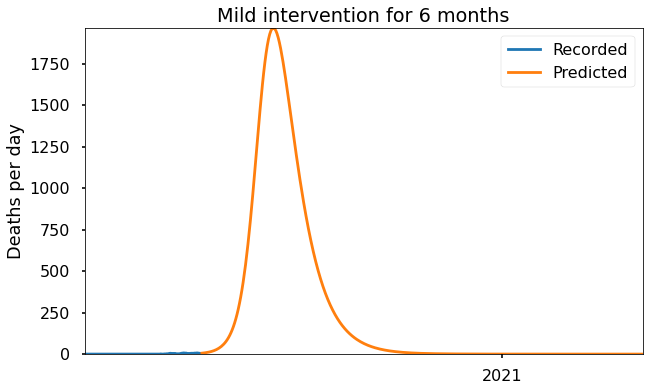

In [192]:
region='Saudi Arabia'
N = data.get_population(region)
ifr = avg_ifr(region)
beta = 0.27
gamma = 0.07
data_dates, cum_cases, cum_deaths = data.load_time_series(region,smooth)
restr_dates = data_dates; restr_deaths=cum_deaths
data_start = mdates.date2num(data_dates[0])
u0, offset, inferred_data_dates = infer_initial_data(restr_deaths,data_start,ifr,gamma,N)

q_past, _ = assess_intervention_effectiveness(restr_deaths,N,ifr,restr_dates,slope_penalty=100)

S, I, R= SIR(u0, beta=beta, gamma=gamma, N=N, T=offset+1, q=q_past, 
             intervention_start=0, intervention_length=offset*3)

q_current = q_past(round(offset*1.0))
q_const, _ = assess_intervention_effectiveness(restr_deaths,N,ifr,restr_dates,fit_type='constant')
q_const = q_const(offset)
q1 = max(0,min(1,q_current)); q2 = max(0,min(1,q_const))
qmin = max(0,min(q1,q2)-0.2)
qmax = min(1,max(q1,q2)+0.2)
q_current = 0.5*(q_current+q_const)
print(q_current,qmin,qmax)

u0 = np.array([S[-1],I[-1],R[-1]])
prediction_dates, pred_cum_deaths, pred_cum_deaths_low, \
  pred_cum_deaths_high, pred_daily_deaths_low, pred_daily_deaths_high, \
  S = forecast(u0,0,N,[inferred_data_dates[-1]],cum_deaths,ifr,beta,gamma,
             0.25,0,180,365,'gamma',compute_interval=[qmin,qmax])

daily_deaths = np.insert(np.diff(cum_deaths),0,cum_deaths[0])
mod_deaths = np.diff(R)*ifr
pred_deaths = np.diff(pred_cum_deaths)
plt.plot_date(data_dates,daily_deaths,'-',label='Recorded');
#plt.plot_date(data_dates[-offset-truncate:-truncate],mod_deaths[1:],label='Modelled')
plt.plot_date(prediction_dates[1:],pred_deaths,'-',label='Predicted')
#plt.fill_between(prediction_dates[1:],pred_daily_deaths_low,pred_daily_deaths_high,
#                 color='lightgrey',label='Predicted range')
ax = plt.gca()
ax.autoscale(enable=True, axis='both', tight=True)
plt.legend()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
#plt.yscale('log')
plt.title('Mild intervention for 6 months')
plt.ylabel('Deaths per day')
#plt.savefig(region+'_model_test.pdf')

In [189]:
S[-1]/N

0.06744360331903525

In [190]:
pred_cum_deaths[-1]

91429.9884757585

In [191]:
ifr*N

98066.903046

In [194]:
ifr*1/0.6

0.004694819981072486

In [170]:
N/1e6

34.813867

In [150]:
q_current

0.7138888413029438

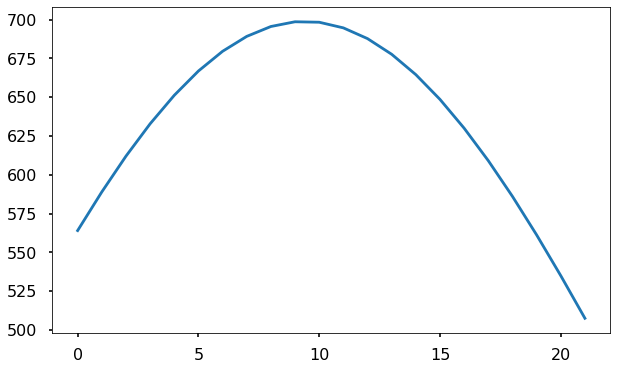

In [14]:
plt.plot(mod_deaths)

In [32]:
len(data_dates[-truncate:])

10

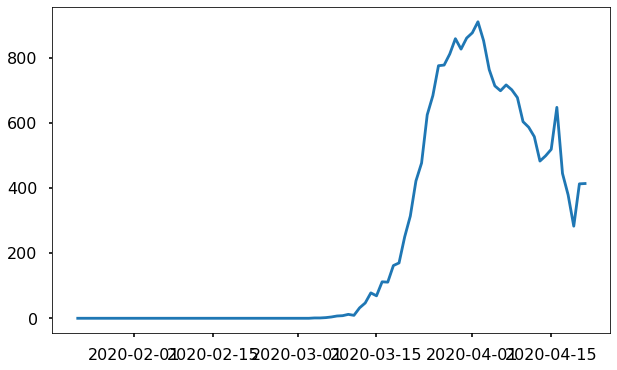

In [13]:
pred_dates = 
plt.plot()
plt.plot_date(data_dates,daily_deaths,'-')

In [8]:
cum_deaths

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     1,     2,     4,
           8,    15,    23,    35,    44,    76,   123,   201,   270,
         382,   493,   655,   825,  1075,  1389,  1811,  2288,  2913,
        3597,  4373,  5151,  5963,  6822,  7649,  8510,  9387, 10298,
       11151, 11915, 12629, 13328, 14045, 14747, 15425, 16029, 16616,
       17174, 17657, 18156, 18675, 19323, 19768, 20147, 20430, 20843,
       21257])

In [10]:
restr_deaths

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     1,     2,     4,
           8,    15,    23,    35,    44,    76,   123,   201,   270,
         382,   493,   655,   825,  1075,  1389,  1811,  2288,  2913,
        3597,  4373,  5151,  5963,  6822,  7649,  8510,  9387, 10298,
       11151, 11915, 12629, 13328, 14045, 14747, 15425, 16029, 16616])

In [9]:
np.hstack((restr_deaths,R*ifr))

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 2.00000000e+00,
       4.00000000e+00, 8.00000000e+00, 1.50000000e+01, 2.30000000e+01,
       3.50000000e+01, 4.40000000e+01, 7.60000000e+01, 1.23000000e+02,
       2.01000000e+02, 2.70000000e+02, 3.82000000e+02, 4.93000000e+02,
      